In [1]:
#In this notebook we try to practice all the classification algorithms that we learned in this course.

#We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

#Lets first load required libraries:


import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:

#Load Data From CSV File
#Let's load the dataset [NB Need to provide link to csv file]


df = pd.read_excel(r'C:\Users\djina\OneDrive\Documentos\Data Science\Becars\VENDIDOS1MESHISTORICOml.xlsx')

df.head()


,MARCA MODELO,MOTOR,CAMBIO,CV,COMBUSTIBLE,COLOR,PROVEEDOR,YEARS,PLAZAS,PCC,...,mes,year,MATRICULA,CTE.GARANTÍA,CTE..PREPARACIÓN,CTE.TOTAL,BF.NETO,GARANTIA,MESES,GARANTIA2
0,RENAULT MEGANE,1.6,MANUAL,75,GASOLINA,NaN,G.COSTA,10,NaN,956.6,...,1,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VOLVO S60,2.5,MANUAL,145,GASOLINA,NaN,PARTICULAR,7,NaN,7900.0,...,2,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VOLKSWAGEN PASSAT,1.9,MANUAL,130,DIESEL,NaN,LEASEPLAN,5,NaN,11200.0,...,2,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SEAT TOLEDO,1.9,MANUAL,110,DIESEL,NaN,LEASEPLAN,5,NaN,7300.0,...,3,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SKODA OCTAVIA,1.9,MANUAL,105,DIESEL,NaN,LEASEPLAN,3,NaN,10000.0,...,3,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:

df.shape

(375, 35)

In [4]:
df.shape

(375, 35)

In [5]:
df['MESES'].value_counts()

1.0    185
2.0     91
Name: MESES, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D190ACAF88>]],
      dtype=object)

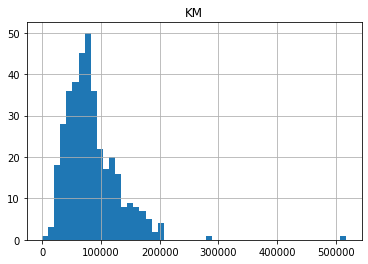

In [6]:
df.hist(column='KM', bins=50)

In [7]:

#Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame
df.drop(['GARANTIA','MOTOR','COLOR','PCOMPRA','BF.NETO','CTE.TOTAL','CTE.GARANTÍA','MATRICULA','edad','sexo','nacionalidad','pais','provincia','localidad','C.P','C AUTO1','NETO','BRUTO','mes'], axis = 'columns', inplace=True)

In [8]:
#Feature after One Hot Encoding
df.head()

,MARCA MODELO,CAMBIO,CV,COMBUSTIBLE,PROVEEDOR,YEARS,PLAZAS,PCC,PVENTA,KM,tipo,llantas,year,CTE..PREPARACIÓN,MESES,GARANTIA2
0,RENAULT MEGANE,MANUAL,75,GASOLINA,G.COSTA,10,NaN,956.6,4500,109988,med,si,2008,NaN,NaN,NaN
1,VOLVO S60,MANUAL,145,GASOLINA,PARTICULAR,7,NaN,7900.0,10500,185390,gra,si,2008,NaN,NaN,NaN
2,VOLKSWAGEN PASSAT,MANUAL,130,DIESEL,LEASEPLAN,5,NaN,11200.0,15750,73790,gra,si,2008,NaN,NaN,NaN
3,SEAT TOLEDO,MANUAL,110,DIESEL,LEASEPLAN,5,NaN,7300.0,9900,97257,gra,si,2008,NaN,NaN,NaN
4,SKODA OCTAVIA,MANUAL,105,DIESEL,LEASEPLAN,3,NaN,10000.0,12600,92481,gra,si,2008,NaN,NaN,NaN


In [9]:
df = df.dropna()
df.head()

,MARCA MODELO,CAMBIO,CV,COMBUSTIBLE,PROVEEDOR,YEARS,PLAZAS,PCC,PVENTA,KM,tipo,llantas,year,CTE..PREPARACIÓN,MESES,GARANTIA2
99,VOLKSWAGEN POLO,MANUAL,75,GASOLINA,MAVISA,12,5.0,1805.0,4500,91431,peq,si,2016,2089.46,2.0,si
100,OPEL INSIGNIA,MANUAL,130,DIESEL,ARVAL,4,5.0,10821.0,13300,74210,gra,si,2016,307.60,1.0,si
101,CITROEN C4,MANUAL,110,GASOLINA,AUTO1,10,5.0,2250.0,5300,82294,med,no,2016,986.07,1.0,si
102,AUDI A4,MANUAL,130,DIESEL,MUNDOMOVIL,12,5.0,4000.0,7500,184488,gra,si,2016,967.89,1.0,si
103,RENAULT TRAFIC,MANUAL,115,DIESEL,ARVAL,6,6.0,10900.0,13700,84172,fur,no,2016,821.60,1.0,si


In [10]:

grouped_test_meses = df.groupby(['MESES'],as_index= False).mean()
grouped_test_meses


,MESES,CV,YEARS,PLAZAS,PCC,PVENTA,KM,year,CTE..PREPARACIÓN
0,1.0,110.735135,8.772973,5.172973,5089.762757,7906.886486,84749.724324,2016.762162,767.282541
1,2.0,107.582418,8.934066,5.109890,4845.768791,7249.802198,105433.021978,2016.736264,1197.914725


In [11]:

grouped_test_meses = df.groupby(['MESES','year'],as_index= False).mean()
grouped_test_meses

,MESES,year,CV,YEARS,PLAZAS,PCC,PVENTA,KM,CTE..PREPARACIÓN
0,1.0,2015,115.943396,7.867925,5.075472,5274.483019,7997.924528,99094.943396,697.458679
1,1.0,2016,114.387755,7.877551,5.204082,6222.530612,9132.448980,97425.061224,676.233469
2,1.0,2017,109.777778,7.888889,5.500000,5619.861667,8588.833333,68929.444444,748.043889
3,1.0,2018,109.551724,10.344828,5.310345,4547.241379,7483.620690,79703.172414,862.946897
4,1.0,2019,99.884615,10.230769,5.000000,3534.961538,6141.153846,58811.807692,983.221538
5,1.0,2020,98.600000,11.200000,5.000000,3221.800000,6010.000000,57161.000000,779.251000
6,2.0,2015,112.709677,8.129032,5.193548,4664.322258,7197.741935,127473.000000,1177.880968
7,2.0,2016,114.722222,8.333333,5.222222,5588.277778,8360.555556,94347.055556,1083.005556
8,2.0,2017,106.666667,9.500000,5.000000,4839.833333,7267.083333,135598.166667,1108.405833
9,2.0,2018,95.000000,9.083333,5.000000,4111.916667,6243.916667,77694.250000,1088.510000


In [12]:
grouped_test_mesesmax = df.groupby(['MESES','year','tipo','COMBUSTIBLE'],as_index= False).max()
grouped_test_mesesmax.drop(['MARCA MODELO','CAMBIO','PROVEEDOR','llantas'], axis = 'columns', inplace=True)
grouped_test_mesesmax
grouped_test_mesesmax[(grouped_test_mesesmax.year==2020) & (grouped_test_mesesmax.MESES==1.0)]

,MESES,year,tipo,COMBUSTIBLE,CV,YEARS,PLAZAS,PCC,PVENTA,KM,CTE..PREPARACIÓN,GARANTIA2
47,1.0,2020,med,DIESEL,110,14,5.0,3581.0,6250,85589,1449.67,si
48,1.0,2020,med,GASOLINA,125,15,5.0,4288.0,7100,92335,455.25,si
49,1.0,2020,mon,GASOLINA,110,11,5.0,3631.0,6200,43482,775.15,si
50,1.0,2020,peq,GASOLINA,88,12,5.0,4940.0,7500,56619,1449.58,si


In [13]:

grouped_test_mesesmin = df.groupby(['MESES','year'],as_index= False).min()
grouped_test_mesesmin


,MESES,year,MARCA MODELO,CAMBIO,CV,COMBUSTIBLE,PROVEEDOR,YEARS,PLAZAS,PCC,PVENTA,KM,tipo,llantas,CTE..PREPARACIÓN,GARANTIA2
0,1.0,2015,CITROEN C3,AUTOMATICO,60,DIESEL,ALD,3,3.0,1000.0,3300,22833,fur,no,65.01,no
1,1.0,2016,AUDI A4,MANUAL,65,DIESEL,ALD,3,5.0,100.0,2900,30145,fur,no,161.40,no
2,1.0,2017,AUDI A6,AUTOMATICO,68,DIESEL,ALD,3,4.0,1900.0,4700,24060,fur,no,0.00,no
3,1.0,2018,AUDI A4,AUTOMATICO,70,DIESEL,AUTO1,6,5.0,1000.0,4100,21416,gra,no,173.00,no
4,1.0,2019,CITROEN C4,AUTOMATICO,80,DIESEL,ARVESA,6,5.0,900.0,3700,18999,med,no,338.22,no
5,1.0,2020,CITROEN C4,MANUAL,80,DIESEL,AUTO1,7,5.0,1000.0,4300,35253,med,no,212.86,si
6,2.0,2015,AUDI A4,AUTOMATICO,75,DIESEL,ALD,2,5.0,70.0,1300,54228,fur,no,36.00,no
7,2.0,2016,AUDI A4,MANUAL,75,DIESEL,ALD,3,5.0,1500.0,4500,32553,gra,no,252.40,si
8,2.0,2017,AUDI A4,AUTOMATICO,70,DIESEL,AUTO1,2,5.0,1000.0,2300,28756,gra,no,137.40,no
9,2.0,2018,CITROEN XSARA PICASSO,MANUAL,70,DIESEL,AUTO1,5,5.0,100.0,1800,21722,med,no,346.18,no


In [14]:
df.isnull().sum()

MARCA MODELO        0
CAMBIO              0
CV                  0
COMBUSTIBLE         0
PROVEEDOR           0
YEARS               0
PLAZAS              0
PCC                 0
PVENTA              0
KM                  0
tipo                0
llantas             0
year                0
CTE..PREPARACIÓN    0
MESES               0
GARANTIA2           0
dtype: int64

In [15]:
df = pd.DataFrame(df)

df_columns = df.columns

predictors = df[df_columns[df_columns != 'MESES']] # all columns except MESES 
target = df['MESES'] # MESES  column

In [16]:
predictors.head()

,MARCA MODELO,CAMBIO,CV,COMBUSTIBLE,PROVEEDOR,YEARS,PLAZAS,PCC,PVENTA,KM,tipo,llantas,year,CTE..PREPARACIÓN,GARANTIA2
99,VOLKSWAGEN POLO,MANUAL,75,GASOLINA,MAVISA,12,5.0,1805.0,4500,91431,peq,si,2016,2089.46,si
100,OPEL INSIGNIA,MANUAL,130,DIESEL,ARVAL,4,5.0,10821.0,13300,74210,gra,si,2016,307.60,si
101,CITROEN C4,MANUAL,110,GASOLINA,AUTO1,10,5.0,2250.0,5300,82294,med,no,2016,986.07,si
102,AUDI A4,MANUAL,130,DIESEL,MUNDOMOVIL,12,5.0,4000.0,7500,184488,gra,si,2016,967.89,si
103,RENAULT TRAFIC,MANUAL,115,DIESEL,ARVAL,6,6.0,10900.0,13700,84172,fur,no,2016,821.60,si


In [17]:
target.head()

99     2.0
100    1.0
101    1.0
102    1.0
103    1.0
Name: MESES, dtype: float64

In [18]:
predictors = pd.get_dummies(predictors, columns = ["MARCA MODELO"])
predictors = pd.get_dummies(predictors, columns = ["PROVEEDOR"])
predictors = pd.get_dummies(predictors, columns = ["CAMBIO"])
predictors = pd.get_dummies(predictors, columns = ["COMBUSTIBLE"])
predictors = pd.get_dummies(predictors, columns = ["tipo"])
predictors = pd.get_dummies(predictors, columns = ["llantas"])
predictors = pd.get_dummies(predictors, columns = ["GARANTIA2"])

In [19]:
#Feature selection
#Lets defind feature sets, X:


x = predictors
x[0:5]


,CV,YEARS,PLAZAS,PCC,PVENTA,KM,year,CTE..PREPARACIÓN,MARCA MODELO_AUDI A4,MARCA MODELO_AUDI A6,...,tipo_mon,tipo_monp,tipo_peq,tipo_pickup,tipo_sub,tipo_tt,llantas_no,llantas_si,GARANTIA2_no,GARANTIA2_si
99,75,12,5.0,1805.0,4500,91431,2016,2089.46,0,0,...,0,0,1,0,0,0,0,1,0,1
100,130,4,5.0,10821.0,13300,74210,2016,307.60,0,0,...,0,0,0,0,0,0,0,1,0,1
101,110,10,5.0,2250.0,5300,82294,2016,986.07,0,0,...,0,0,0,0,0,0,1,0,0,1
102,130,12,5.0,4000.0,7500,184488,2016,967.89,1,0,...,0,0,0,0,0,0,0,1,0,1
103,115,6,6.0,10900.0,13700,84172,2016,821.60,0,0,...,0,0,0,0,0,0,1,0,0,1


In [20]:

#What are our lables? 


y = target
y

99     2.0
100    1.0
101    1.0
102    1.0
103    1.0
      ... 
370    2.0
371    2.0
372    2.0
373    2.0
374    2.0
Name: MESES, Length: 276, dtype: float64

In [21]:
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
X[0:5]

array([[-1.38409832e+00,  1.07017878e+00, -2.64135272e-01,
        -1.12468117e+00, -1.08621038e+00, -2.74323830e-03,
        -4.62363807e-01,  1.98608480e+00, -1.72773685e-01,
        -8.54357658e-02, -8.54357658e-02, -6.03022689e-02,
        -6.03022689e-02, -1.04828484e-01, -2.13200716e-01,
        -1.04828484e-01, -6.03022689e-02, -1.35831456e-01,
        -6.03022689e-02, -8.54357658e-02, -6.03022689e-02,
        -6.03022689e-02, -6.03022689e-02, -6.03022689e-02,
        -8.54357658e-02, -1.35831456e-01, -2.13200716e-01,
        -6.03022689e-02, -6.03022689e-02, -6.03022689e-02,
        -1.21267813e-01, -6.03022689e-02, -6.03022689e-02,
        -6.03022689e-02, -8.54357658e-02, -6.03022689e-02,
        -6.03022689e-02, -8.54357658e-02, -6.03022689e-02,
        -6.03022689e-02, -6.03022689e-02, -1.21267813e-01,
        -6.03022689e-02, -1.49071198e-01, -6.03022689e-02,
        -3.15597202e-01, -8.54357658e-02, -1.21267813e-01,
        -2.56197318e-01, -1.83597018e-01, -6.03022689e-0

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (220, 127) (220,)
Test set: (56, 127) (56,)


In [23]:
#Import library
#Classifier implementing the k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [24]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.53571429, 0.64285714, 0.58928571, 0.64285714, 0.66071429,
       0.66071429, 0.67857143, 0.67857143, 0.66071429, 0.66071429,
       0.66071429, 0.66071429, 0.66071429, 0.66071429, 0.66071429,
       0.60714286, 0.625     , 0.625     , 0.625     ])

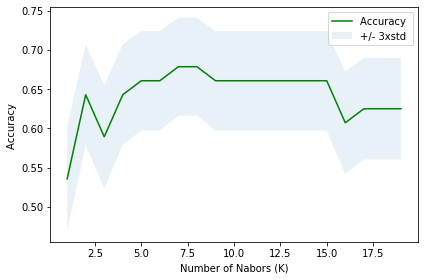

In [25]:
#Plot model accuracy for Different number of Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [26]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6785714285714286 with k= 7


In [27]:
#Training
#Lets start the algorithm with k=3 for now:
k =7
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [28]:

X_test[0:5]

array([[-1.58356110e+00, -9.52898910e-01, -2.64135272e-01,
         2.04165178e-01, -1.15844381e-01, -8.25948582e-01,
         7.64678604e-01,  1.42223518e-01, -1.72773685e-01,
        -8.54357658e-02, -8.54357658e-02, -6.03022689e-02,
        -6.03022689e-02, -1.04828484e-01, -2.13200716e-01,
        -1.04828484e-01, -6.03022689e-02, -1.35831456e-01,
        -6.03022689e-02, -8.54357658e-02, -6.03022689e-02,
        -6.03022689e-02, -6.03022689e-02, -6.03022689e-02,
        -8.54357658e-02, -1.35831456e-01, -2.13200716e-01,
        -6.03022689e-02, -6.03022689e-02, -6.03022689e-02,
        -1.21267813e-01, -6.03022689e-02, -6.03022689e-02,
        -6.03022689e-02, -8.54357658e-02, -6.03022689e-02,
        -6.03022689e-02, -8.54357658e-02, -6.03022689e-02,
        -6.03022689e-02, -6.03022689e-02, -1.21267813e-01,
        -6.03022689e-02, -1.49071198e-01, -6.03022689e-02,
        -3.15597202e-01, -8.54357658e-02, -1.21267813e-01,
        -2.56197318e-01, -1.83597018e-01, -6.03022689e-0

In [29]:
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test[0:5]

array([[-1.55238353e+00, -1.07303330e+00, -2.19381727e-01,
         3.48010345e-01,  2.53340001e-03, -9.85998214e-01,
         7.53511752e-01,  8.95752039e-02,  1.00000000e+00,
         0.00000000e+00, -1.34839972e-01, -1.34839972e-01,
        -1.34839972e-01, -2.37915476e-01, -2.37915476e-01,
        -1.34839972e-01, -1.34839972e-01, -2.37915476e-01,
        -1.00000000e+00, -1.34839972e-01, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.34839972e-01,
         0.00000000e+00, -1.00000000e+00, -1.92450090e-01,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00,  0.00000000e+00, -1.34839972e-01,
        -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00, -1.92450090e-01,
        -1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
        -2.77350098e-01, -1.00000000e+00, -1.00000000e+00,
        -3.13112146e-01, -2.37915476e-01, -1.34839972e-0

In [30]:
#Predicting
#we can use the model to predict the test set:
yhat = neigh.predict(X_test)
yhat[0:5]


array([2., 1., 1., 1., 1.])

In [31]:
#The best accuracy with knn was 7.

In [32]:
#Setting up the Decision Tree
from sklearn.tree import DecisionTreeClassifier
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
predbecars = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [33]:
predbecars # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
predbecars.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [35]:
predbecars = predbecars.predict(X_testset)

In [36]:
print (predbecars [0:5])
print (y_testset [0:5])

[1. 2. 1. 1. 1.]
221    2.0
217    1.0
182    1.0
287    2.0
253    2.0
Name: MESES, dtype: float64


In [37]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predbecars))

DecisionTrees's Accuracy:  0.6626506024096386


In [38]:
#Modeling (Logistic Regression with Scikit-learn)
#import logistic regression and use liblinear numerical optimizer t find parameters
#use a C parameter of 0.01
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR=LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
#Now we can predict using our test set:
yhat = LR.predict(X_test)
yhat.shape


(56,)

In [40]:
#predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of 
#class 1, P(Y=1|X), and second column is probability of class 2, P(Y=2|X):
yhat_prob = LR.predict_proba(X_test)
yhat_prob.shape

(56, 2)

In [41]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test,yhat)

C:\Users\djina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.4107142857142857

In [42]:
  from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,2]))

[[ 3 32]
 [ 1 20]]


Confusion matrix, without normalization
[[ 3 32]
 [ 1 20]]


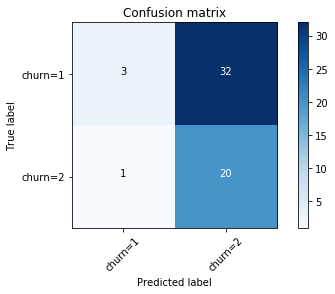

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=2'],normalize= False,  title='Confusion matrix')

In [44]:
#For 22 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1, which is excelent
#100%.
#The classifier correctly predicted 1 of them as 2, and 19 of them wrongly as 1. So, it has done a bad job 5% in predicting the
#customers with churn value 2. 

In [45]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

         1.0       0.75      0.09      0.15        35
         2.0       0.38      0.95      0.55        21

    accuracy                           0.41        56
   macro avg       0.57      0.52      0.35        56
weighted avg       0.61      0.41      0.30        56



In [46]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.7867578584247015

In [47]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.64


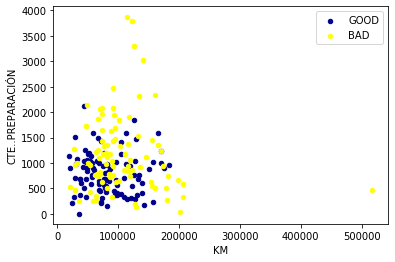

In [48]:
#Modeling (SVM with Scikit-learn)

#Lets look at the distribution of the classes based on KM (kilometers) and CTE..PREPARACIÓN:
ax = df[df['MESES'] == 1][0:100].plot(kind='scatter', x='KM', y='CTE..PREPARACIÓN', color='DarkBlue', label='GOOD');
df[df['MESES'] == 2][0:100].plot(kind='scatter', x='KM', y='CTE..PREPARACIÓN', color='Yellow', label='BAD', ax=ax);
plt.show()


In [49]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1., 1., 1., 1., 1.])

In [51]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\Users\djina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.62      1.00      0.77        35
         2.0       0.00      0.00      0.00        21

    accuracy                           0.62        56
   macro avg       0.31      0.50      0.38        56
weighted avg       0.39      0.62      0.48        56

Confusion matrix, without normalization
[[35  0]
 [21  0]]


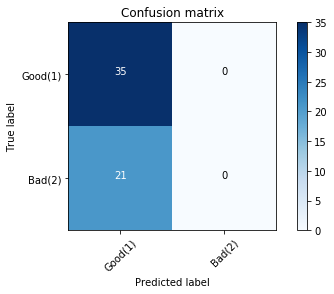

In [53]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good(1)','Bad(2)'],normalize= False,  title='Confusion matrix')

In [54]:
#You can also easily use the f1_score from sklearn library:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.4807692307692308

In [55]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\djina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.625

In [56]:
# We rebuild the model, but this time with a __linear__ kernel
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))

Avg F1-score: 0.6977
Jaccard score: 0.6964


C:\Users\djina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


              precision    recall  f1-score   support

         1.0       0.91      0.57      0.70        35
         2.0       0.56      0.90      0.69        21

    accuracy                           0.70        56
   macro avg       0.73      0.74      0.70        56
weighted avg       0.78      0.70      0.70        56

Confusion matrix, without normalization
[[20 15]
 [ 2 19]]


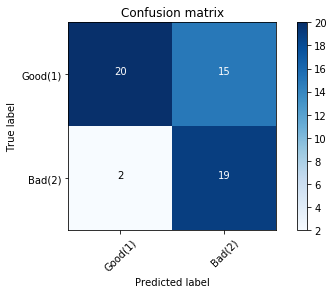

In [57]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Good(1)','Bad(2)'],normalize= False,  title='Confusion matrix')